# College Recruitment Improvement Study
**Author:** Jadon Oliver  
**Institution:** County College of Morris

This analysis explores computing education trends across majors and non-majors from 2021–2023. It identifies motivational and demographic patterns to guide recruitment strategies.

### Import pandas and load CSV files into DataFrames.

In [2]:
# Importing necessary libraries for data manipulation, analysis, and visualization
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Specify path to the CSV file containing survey results for majors in 2023
cleaned_major_survey_result = "C:/Users/jmaol/PycharmProjects/College-Recruitment-Improvement-Study/Cleaned Majors Survey 2023.csv"
# Loading the CSV file into a pandas DataFrame for analysis
cleaned_msr = pd.read_csv(cleaned_major_survey_result)

# Specify path to the CSV file containing gender data for non-majors in 2023
cleaned_non_major_survey_result_gender = "C:/Users/jmaol/PycharmProjects/College-Recruitment-Improvement-Study/Major and Non Major Gender Data/Cleaned Non-Majors Survey Gender 2023.csv"
# Loading the non-majors gender data into a pandas DataFrame
cleaned_non_msr_gender = pd.read_csv(cleaned_non_major_survey_result_gender)

# Specify path to the CSV file containing gender data for majors in 2023
cleaned_major_survey_result_gender = "C:/Users/jmaol/PycharmProjects/College-Recruitment-Improvement-Study/Major and Non Major Gender Data/Cleaned Majors Survey Gender 2023.csv"
# Loading the majors gender data into a pandas DataFrame
cleaned_msr_gender = pd.read_csv(cleaned_major_survey_result_gender)

# Specify path to the CSV file containing motivation data for majors in 2023
cleaned_major_survey_motivation_result_2023 = "C:/Users/jmaol/PycharmProjects/College-Recruitment-Improvement-Study/Major Motivation Cleaned Data/Cleaned Majors Motivation Survey 2023.csv"
# Loading the majors motivation data for 2023 into a DataFrame
cleaned_motivation_msr_2023 = pd.read_csv(cleaned_major_survey_motivation_result_2023)

# Specify path to the CSV file containing motivation data for majors in 2022
cleaned_major_survey_motivation_result_2022 = "C:/Users/jmaol/PycharmProjects/College-Recruitment-Improvement-Study/Major Motivation Cleaned Data/Cleaned Majors Motivation Survey 2022.csv"
# Loading the majors motivation data for 2022 into a DataFrame
cleaned_motivation_msr_2022 = pd.read_csv(cleaned_major_survey_motivation_result_2022)

# Specify path to the CSV file containing motivation data for majors in 2021
cleaned_major_survey_motivation_result_2021 = "C:/Users/jmaol/PycharmProjects/College-Recruitment-Improvement-Study/Major Motivation Cleaned Data/Cleaned Majors Motivation Survey 2021.csv"
# Loading the majors motivation data for 2021 into a DataFrame
cleaned_motivation_msr_2021 = pd.read_csv(cleaned_major_survey_motivation_result_2021)

# Question 1. Looking at the latest survey results (2023) from both the Majors and Non-Majors surveys, what are the gender demographic differences between the Majors and Non-Majors respondents?

### Count gender representation in each dataset

In [6]:
# Count the occurrences of each gender category among majors and non-majors.
gender_counts_majors = cleaned_msr_gender['gender'].value_counts()
gender_counts_non_majors = cleaned_non_msr_gender['gender'].value_counts()

### Plotting gender demographics for Majors and Non-Majors and separating them into gender columns with each color being major or non-major using matplotlib, and numpy.

In [4]:
#shows the gender_counts_majors counts
gender_counts_majors

gender
Man                  193
Woman                 39
Non-binary             7
Prefer not to say      3
Name: count, dtype: int64

In [5]:
#shows the gender_counts_non_majors counts
gender_counts_non_majors

gender
Woman                52
Man                  42
Prefer not to say     7
Non-binary            2
Name: count, dtype: int64

#### Looking at the data, there are more women that do not have majors than men do not have majors even with there being more data on men proportionally in the data set. There are more men in total but there are more men in majors than women and less men with non-majors than women. This shows that women are significantly more likely to be non majors than men. Additionally, non binary and students who prefer not to say are at a very negligible number within the dataset

In [7]:
# Define the categories of gender to ensure consistent ordering and inclusion of all categories.
categories = ['Man', 'Woman', 'Non-binary', 'Prefer not to say']

# Reindex the gender counts to include all categories, filling any missing values with 0, also matches up the categories with their counterpart in the other group.
gender_counts_majors = gender_counts_majors.reindex(categories, fill_value=0)
gender_counts_non_majors = gender_counts_non_majors.reindex(categories, fill_value=0)

In [8]:
gender_counts_majors

gender
Man                  193
Woman                 39
Non-binary             7
Prefer not to say      3
Name: count, dtype: int64

In [9]:
gender_counts_non_majors

gender
Man                  42
Woman                52
Non-binary            2
Prefer not to say     7
Name: count, dtype: int64

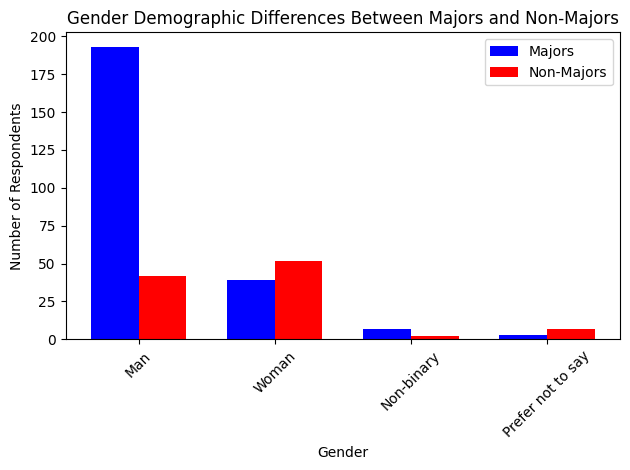

In [113]:
# Determine the number of categories and set up the index for plotting.
n_categories = len(categories)
index = np.arange(n_categories)

# Define the width of the bars in the bar chart.
bar_width = 0.35

# Create a figure and a set of subplots for the bar chart.
fig, ax = plt.subplots()
# Plot the bar chart for majors.
bars1 = ax.bar(index - bar_width/2, gender_counts_majors, bar_width, label='Majors', color='blue')
# Plot the bar chart for non-majors.
bars2 = ax.bar(index + bar_width/2, gender_counts_non_majors, bar_width, label='Non-Majors', color='red')

# Set labels and title for the chart.
ax.set_xlabel('Gender')
ax.set_ylabel('Number of Respondents')
ax.set_title('Gender Demographic Differences Between Majors and Non-Majors')
# Set the position of the x ticks.
ax.set_xticks(index)
# Set the labels for the x ticks.
ax.set_xticklabels(categories)
# Add a legend to the chart.
ax.legend()

# Rotate the x tick labels for better readability.
plt.xticks(rotation=45)
# Adjust the layout to make room for the rotated x tick labels.
plt.tight_layout()

# Display the plot.
plt.show()

# Question 2. Look at the records of just the Computing Majors only as one group (2021-2023, did not look at 2020 because covid most likely majorly impacted the data from this year). Computing Majors include: Computer Science, IT, Game Dev, Digital Media Technology, Technical Studies, Information Security, Data Analytics and Web Development. What are the major motivations why computing majors seek a computing degree/certificate?

### Combine all of the files and filter out computing majors

In [114]:
# Combine the motivation survey data from 2021, 2022, and 2023 into one DataFrame.
combined_motivation = pd.concat([cleaned_motivation_msr_2021, cleaned_motivation_msr_2022, cleaned_motivation_msr_2023])

# Define the list of computing majors for filtering the motivation data.
computing_majors = [
    "Computer Science", "IT", "Game Dev", "Digital Media Technology",
    "Technical Studies", "Information Security", "Data Analytics", "Web Development"
]

# Filter the combined motivation data for respondents in computing majors.
filtered_motivation = combined_motivation[combined_motivation['degree_program'].isin(computing_majors)]

In [115]:
#show the table of data
filtered_motivation

,course,degree_program,motivation_transfer_bachelor,motivation_transfer_hs,motivation_current_tech,motivation_job_computing,motivation_relocation,motivation_prof_dev,motivation_personal_enrich,motivation_job_displacement,motivation_it_cert,motivation_financial,motivation_career_change,motivation_career_advancement
2,CMP 128 Computer Science I,Computer Science,Yes,No,Yes,Yes,No,No,No,No,No,No,No,No
3,CMP 128 Computer Science I,Computer Science,Yes,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes
5,CMP 128 Computer Science I,Computer Science,No,No,Yes,Yes,No,No,No,No,No,No,No,No
9,CMP 128 Computer Science I,Computer Science,No,No,Yes,Yes,No,Yes,Yes,No,No,No,No,Yes
10,CMP 128 Computer Science I,Computer Science,Yes,No,Yes,Yes,No,Yes,Yes,No,No,No,Yes,Yes
14,CMP 128 Computer Science I,Computer Science,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Yes
16,CMP 128 Computer Science I,Computer Science,Yes,No,No,Yes,No,No,No,No,No,No,No,No
20,CMP 128 Computer Science I,Computer Science,Yes,No,No,Yes,No,No,No,No,No,Yes,No,No
22,CMP 128 Computer Science I,Computer Science,Yes,No,Yes,Yes,No,Yes,Yes,No,No,Yes,No,Yes
23,CMP 128 Computer Science I,Computer Science,Yes,No,No,Yes,No,Yes,No,No,No,No,No,No


### Takes the the yes and no responses for each motivation here by separating each of the columns for the graph and the yes and nos into a dataframe to be graphed later.

In [116]:
# Define the list of motivation factors to be analyzed.
motivation_columns = [
    'motivation_transfer_bachelor', 'motivation_transfer_hs', 'motivation_current_tech',
    'motivation_job_computing', 'motivation_relocation', 'motivation_prof_dev',
    'motivation_personal_enrich', 'motivation_job_displacement', 'motivation_it_cert',
    'motivation_financial', 'motivation_career_change', 'motivation_career_advancement',
]

# Initialize a dictionary to hold the total counts of 'Yes' and 'No' responses for each motivation factor.
motivation_total = {}

# Loop through each motivation factor, count the occurrences of 'Yes' and 'No', and add the totals to the dictionary.
for motivation in motivation_columns:
    totals = filtered_motivation[motivation].value_counts().reindex(['Yes', 'No']).fillna(0)
    motivation_total[motivation] = totals

# Convert the dictionary of motivation totals into a DataFrame for easier analysis and visualization.
motivation_df = pd.DataFrame(motivation_total)

In [117]:
# shows motivation_df table info
motivation_df

,motivation_transfer_bachelor,motivation_transfer_hs,motivation_current_tech,motivation_job_computing,motivation_relocation,motivation_prof_dev,motivation_personal_enrich,motivation_job_displacement,motivation_it_cert,motivation_financial,motivation_career_change,motivation_career_advancement
Yes,204,18,127,232,37,151,158,32,89,146,69,147
No,46,232,123,18,213,99,92,218,161,104,181,103


### Plotting

#### The top 3 motivations in seeking computing degree are getting a job in computing, getting a bachelor,, and personal enrichment while the least common motivations were high school transfer, job displacement, and relocation. The top 3 motivations should be further marketed to get more students interested in the program. Exhibited through red and green signifying good and bad.

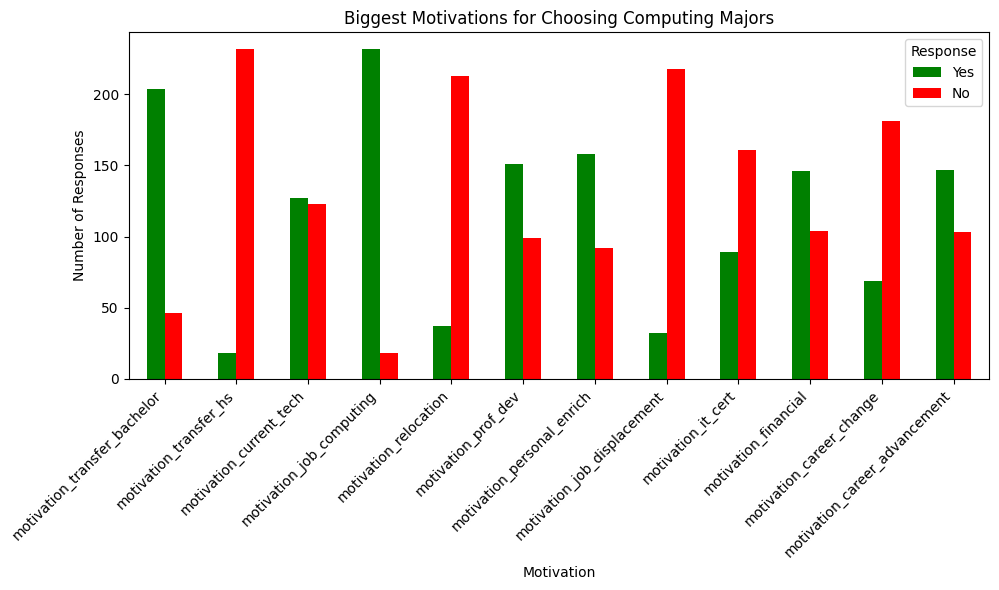

In [118]:
# Plotting motivations for choosing computing majors as a bar chart
motivation_df.T.plot(kind='bar', figsize=(10, 6), color=['green', 'red'])
# Setting the title of the plot
plt.title('Biggest Motivations for Choosing Computing Majors')
# Setting the Y-axis label
plt.ylabel('Number of Responses')
# Setting the X-axis label
plt.xlabel('Motivation')
# Rotating X-axis labels for better readability
plt.xticks(rotation=45)
# Adding a legend with a title
plt.legend(title='Response')
# Adjusting subplot parameters to make sure everything fits without overlapping
plt.tight_layout()
# Aligning X-axis labels to the right for better clarity
for label in plt.gca().get_xticklabels():
    label.set_horizontalalignment('right')
# Displaying the plot
plt.show()

# 3. Looking at the latest survey results (2023) Which age group is most interested in pursuing a computing degree or certificate so you can target people in that age range more?

### filter out all non computing majors

In [119]:
# List of computing majors to filter the dataset
computing_majors = [
    "Computer Science", "IT", "Game Dev", "Digital Media Technology",
    "Technical Studies", "Information Security", "Data Analytics", "Web Development"
]

# Filtering the dataset for respondents in computing majors
filtered_2023_major_data = cleaned_msr[cleaned_msr['degree_program'].isin(computing_majors)]

#prints filtered data
filtered_2023_major_data

,course,degree_program,heard_tv,heard_social_media,heard_radio,heard_other,heard_in_app_ad,heard_home_mailer,heard_hs_teacher,heard_hs_counselor,...,motivation_prof_dev,motivation_personal_enrich,motivation_job_displacement,motivation_it_cert,motivation_financial,motivation_career_change,motivation_career_advancement,gender,age,major
1,CMP 128 Computer Science I,Computer Science,Don't recall,Don't recall,No,Don't recall,No,No,Yes,Don't recall,...,Yes,No,No,No,Yes,No,Yes,Woman,21-24,Computer Science
4,CMP 239 Internet & Web Page Design,Computer Science,No,No,No,No,Don't recall,No,Yes,Yes,...,No,No,No,Yes,Yes,No,Yes,Woman,19-20,Computer Science
6,NaN,Computer Science,No,No,No,No,No,Yes,Yes,Yes,...,No,No,No,No,No,No,No,Man,19-20,Computer Science
7,CMP 128 Computer Science I,Computer Science,No,No,No,No,No,No,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Man,19-20,Computer Science
8,CMP 128 Computer Science I,Computer Science,No,No,No,Yes,No,No,Yes,Yes,...,No,No,No,No,No,Yes,Yes,Man,21-24,Computer Science
14,NaN,Computer Science,No,No,No,No,No,Yes,No,No,...,Yes,Yes,No,No,Yes,Yes,Yes,Man,35-64,Computer Science
15,CMP 128 Computer Science I,Computer Science,No,No,No,No,No,No,Yes,No,...,No,Yes,No,Yes,Yes,No,Yes,Man,19-20,Computer Science
19,CMP 128 Computer Science I,Computer Science,No,Yes,No,Don't recall,No,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Man,21-24,Computer Science
24,CMP 128 Computer Science I,Computer Science,No,Yes,No,No,No,No,No,No,...,Yes,Yes,No,No,No,No,Yes,Woman,19-20,Computer Science
25,CMP 128 Computer Science I,Computer Science,No,Yes,No,No,No,Yes,Yes,Yes,...,No,Yes,No,No,No,No,No,Man,18 and younger,Computer Science


### gets the counts of all the age columns to be used in a graph later

In [120]:
# Counting the number of respondents by age group
age_group_interest_counts = filtered_2023_major_data['age'].value_counts()
# Sorting the counts by age group for orderly visualization
age_group_interest_counts = age_group_interest_counts.sort_index()
#prints table
age_group_interest_counts

age
18 and younger    19
19-20             27
21-24             15
25-34              9
35-64              3
65+                1
Name: count, dtype: int64

### plots the data points for analysis


#### The most prominent age group within the computing degree is from 19-20, followed by 18 and younger, then 21-24, meaning that generally it would be smart to focus a lot of the advertisements to younger students to increase enrollment.

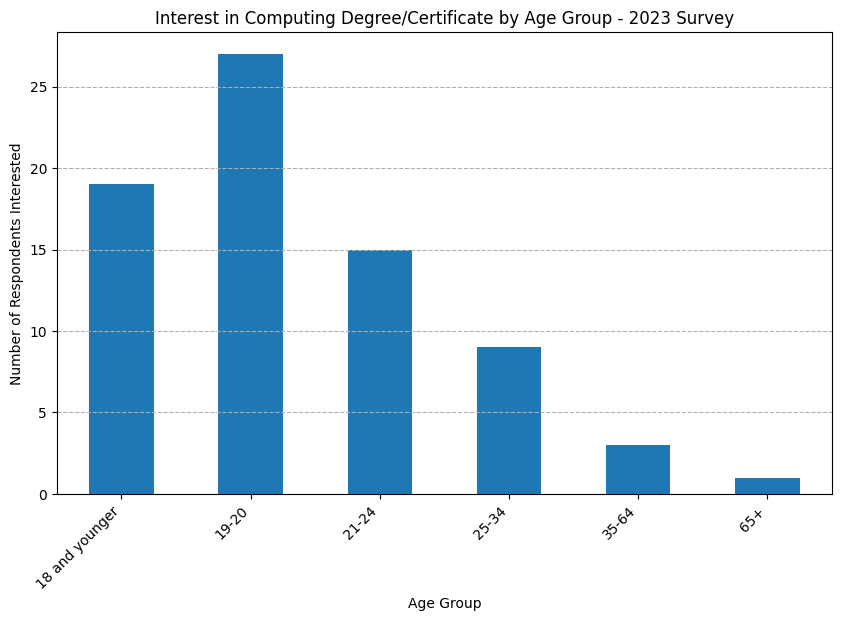

In [121]:
# Plotting interest in computing degrees by age group as a bar chart
plt.figure(figsize=(10, 6))
age_group_interest_counts.plot(kind='bar')
# Setting the plot title
plt.title('Interest in Computing Degree/Certificate by Age Group - 2023 Survey')
# Setting X-axis and Y-axis labels
plt.xlabel('Age Group')
plt.ylabel('Number of Respondents Interested')
# Rotating X-axis labels for readability
plt.xticks(rotation=45)
# Adding a grid on the Y-axis for better readability of the plot
plt.grid(axis='y', linestyle='--')
# Aligning X-axis labels to the right for clarity
for label in plt.gca().get_xticklabels():
    label.set_horizontalalignment('right')
# Displaying the plot
plt.show()

# 4. Looking at the latest survey results (2023) What sources were most popular in the "How did you hear about the County College of Morris" question to find which method is most efficient in outreach of students.

### selects which columns get filtered through for the sources 

In [129]:
# Defining a list of sources from which respondents could have heard about the college
hearing_sources = [
    'heard_tv', 'heard_social_media', 'heard_radio', 'heard_other', 'heard_in_app_ad',
    'heard_home_mailer', 'heard_hs_teacher', 'heard_hs_counselor', 'heard_family_friend',
    'heard_employer', 'heard_ccm_student', 'heard_community_event', 'heard_ccm_website',
    'heard_ccm_alumni', 'heard_billboard'
]

#Initialize a dictionary to hold the total counts of 'Yes' and 'No' responses for each source
source_totals = {}

#Loop through each source to count occurrences of 'Yes' and 'No', and add the totals to the dictionary
for source in hearing_sources:
    totals = cleaned_msr[source].value_counts().reindex(['Yes', 'No']).fillna(0)
    source_totals[source] = totals

#Convert the dictionary of source totals into a DataFrame
source_popularity = pd.DataFrame(source_totals)

#prints out data
source_popularity

,heard_tv,heard_social_media,heard_radio,heard_other,heard_in_app_ad,heard_home_mailer,heard_hs_teacher,heard_hs_counselor,heard_family_friend,heard_employer,heard_ccm_student,heard_community_event,heard_ccm_website,heard_ccm_alumni,heard_billboard
Yes,9,52,6,36,10,40,112,126,168,14,102,47,86,72,20
No,215,172,221,173,213,186,115,107,64,215,129,176,139,153,207


### gets each yes in each column and counts up the total and adds them together with sum to then graph, then graphs them on a plot to analyze

### 

In [130]:
# Calculating the number of 'Yes' responses for each source and creating a series
source_yes_counts = {col: (cleaned_msr[col] == "Yes").sum() for col in hearing_sources}

source_yes_counts_series = pd.Series(source_yes_counts).sort_values(ascending=False)

#prints out data
source_yes_counts_series


heard_family_friend      168
heard_hs_counselor       126
heard_hs_teacher         112
heard_ccm_student        102
heard_ccm_website         86
heard_ccm_alumni          72
heard_social_media        52
heard_community_event     47
heard_home_mailer         40
heard_other               36
heard_billboard           20
heard_employer            14
heard_in_app_ad           10
heard_tv                   9
heard_radio                6
dtype: int64

#### The most popular sources to hear about ccm are through family friends, high school counselors, teachers, and students in that order. Since those are less controllable, the next best sources to target are the ccm website, social media, and having more community events to increase the outreach from outreach sources that ccm has control over. Additionally, there should be less focus on tv, in app ads, and radio because the amount of sources heard through there are negligible. Shown through red green yellow stoplight theory

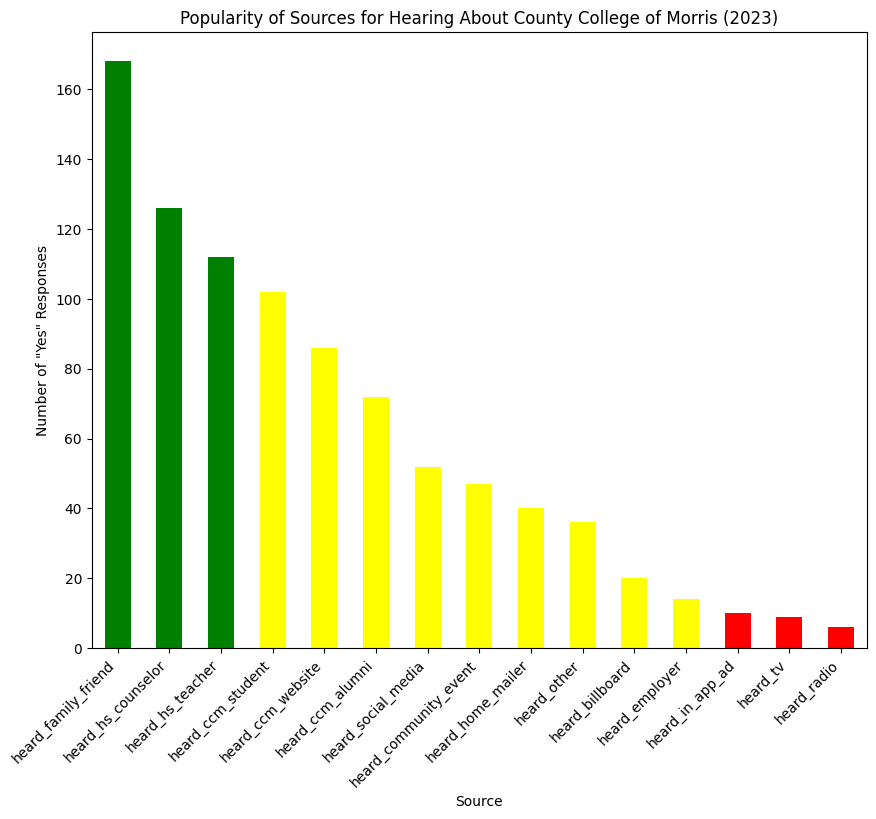

In [131]:
# Plotting the popularity of sources as a bar chart
plt.figure(figsize=(10, 8))

# Determine the total number of categories/sources
total_sources = len(source_yes_counts_series)

# Generate a color list: first three 'green', last three 'red', and any in-between as 'blue' (or any other default color)
if total_sources > 6:
    colors = ['green'] * 3 + ['yellow'] * (total_sources - 6) + ['red'] * 3
else:
    colors = ['green'] if total_sources >= 3 else [] + ['red'] if total_sources >= 3 else []

source_yes_counts_series.plot(kind='bar',color=colors)
# Setting the title and labels for the plot
plt.title('Popularity of Sources for Hearing About County College of Morris (2023)')
plt.xlabel('Source')
plt.ylabel('Number of "Yes" Responses')
# Rotating X-axis labels for readability
plt.xticks(rotation=45)
# Aligning X-axis labels to the right
for label in plt.gca().get_xticklabels():
    label.set_horizontalalignment('right')
# Displaying the plot
plt.show()

## Conclusion

This analysis of County College of Morris survey data from 2021–2023 revealed:

- Women and nonbinary students remain underrepresented in computing majors, particularly compared to non-majors.
- Key motivations for pursuing computing degrees include career opportunities, curiosity, and job stability — with some variation across gender identity.
- Year-over-year trends suggest growing interest in computing programs, though further outreach is needed to expand representation.

These insights can directly inform targeted marketing, program development, and engagement strategies for the Department of Information Technologies.
